In [306]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

## 데이터준비

In [307]:
num_data = 1000

num_epoch = 10000

x_1 = init.uniform_(torch.Tensor(num_data, 1), -15,15)
y_1 = x_1**4 + x_1**2

x_2 = init.uniform_(torch.Tensor(num_data, 1), -15,15)
y_2 = x_2**2 + x_2

noise = init.normal_(torch.FloatTensor(num_data,1), std = 3)
y_noise_1 = (x_1+noise)**4 + (x_1+noise)**2
y_noise_2 = (x_2+noise)**2 + (x_2+noise)


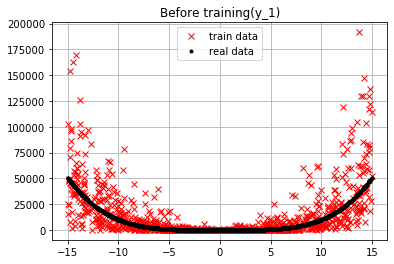

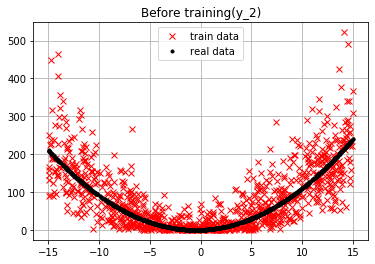

In [308]:
import matplotlib.pyplot as plt

plt.plot(x_1.data, y_noise_1.data, 'rx')
plt.plot(x_1.data, y_1.data, 'k.')
plt.legend(['train data', 'real data'])
plt.title('Before training(y_1)')
plt.grid(True)
plt.show()

plt.plot(x_2.data, y_noise_2.data, 'rx')
plt.plot(x_2.data, y_2.data, 'k.')
plt.legend(['train data', 'real data'])
plt.title('Before training(y_2)')
plt.grid(True)
plt.show()

## 모델

In [309]:
model_1 = nn.Sequential(
    nn.Linear(1,4),
    nn.ReLU(),
    nn.Linear(4,8),
    nn.ReLU(),
    nn.Linear(8,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

model_2 = nn.Sequential(
    nn.Linear(1,3),
    nn.ReLU(),
    nn.Linear(3,5),
    nn.ReLU(),
    nn.Linear(5,1)
)

## 손실함수 , 최적화 함수

In [310]:
loss_func = nn.MSELoss()

optimizer_1 = optim.Adam(model_1.parameters(), lr= 0.005)
optimizer_2 = optim.Adam(model_2.parameters(), lr= 0.005) 

## 학습진행

### y_1

tensor(8.3358e+08)
tensor(4.2834e+08)
tensor(4.1412e+08)
tensor(3.9970e+08)
tensor(3.7598e+08)
tensor(3.4463e+08)
tensor(3.2432e+08)
tensor(3.1816e+08)
tensor(3.1643e+08)
tensor(3.1438e+08)
tensor(3.1389e+08)
tensor(3.1346e+08)
tensor(3.1290e+08)
tensor(3.1111e+08)
tensor(3.0945e+08)
tensor(3.0820e+08)
tensor(3.0733e+08)
tensor(3.0643e+08)
tensor(3.0562e+08)
tensor(3.0478e+08)


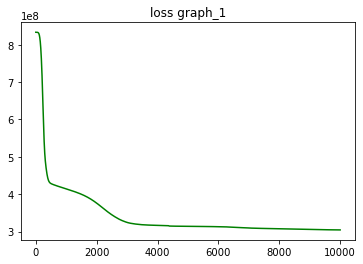

In [311]:
loss_array_1 = []
loss_array_2 = []

for i in range(num_epoch):
    optimizer_1.zero_grad()
    output_1 = model_1(x_1)
    
    loss = loss_func(output_1, y_noise_1)
    loss.backward()
    
    optimizer_1.step()
    
    loss_array_1.append(loss.data)
    if i%500==0 :
        print(loss.data)

## 시각화

plt.plot(loss_array_1,'g-')
plt.title('loss graph_1')
plt.show()

### Y_2

tensor(14791.3193)
tensor(3287.1357)
tensor(3039.2297)
tensor(2900.8611)
tensor(2870.5203)
tensor(2850.5439)
tensor(2845.4307)
tensor(2842.2288)
tensor(2833.4412)
tensor(2830.9478)
tensor(2829.9128)
tensor(2829.1841)
tensor(2828.6191)
tensor(2828.2000)
tensor(2827.8240)
tensor(2827.5396)
tensor(2827.2000)
tensor(2826.9524)
tensor(2826.7007)
tensor(2826.5288)


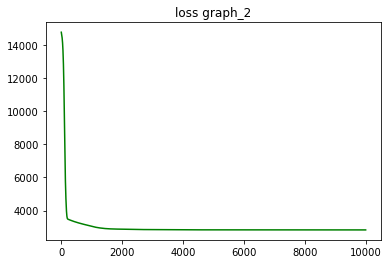

In [312]:
for i in range(num_epoch):
    optimizer_2.zero_grad()
    output_2 = model_2(x_2)
    
    loss = loss_func(output_2, y_noise_2)
    loss.backward()
    
    optimizer_2.step()
    
    loss_array_2.append(loss.data)
    if i%500==0 :
        print(loss.data)

## 시각화

plt.plot(loss_array_2,'g-')
plt.title('loss graph_2')
plt.show()

## 모델검증

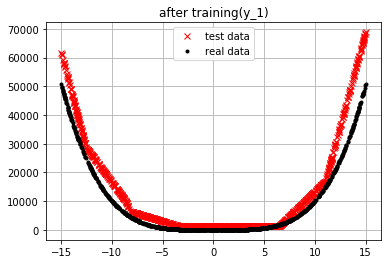

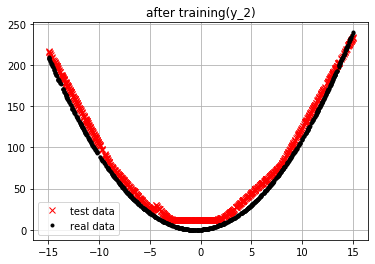

In [313]:
test_x_1 = init.uniform_(torch.Tensor(num_data,1), -15, 15)
test_y_1 = model_1(test_x_1)

plt.plot(test_x_1.data, test_y_1.data,'rx')
plt.plot(x_1.data, y_1.data, 'k.')
plt.legend(['test data','real data'])
plt.title('after training(y_1)')
plt.grid(True)
plt.show()

test_x_2 = init.uniform_(torch.Tensor(num_data,1), -15, 15)
test_y_2 = model_2(test_x_2)

plt.plot(test_x_2.data, test_y_2.data,'rx')
plt.plot(x_2.data, y_2.data, 'k.')
plt.legend(['test data','real data'])
plt.title('after training(y_2)')
plt.grid(True)
plt.show()
